# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, consult the forums for more troubleshooting tips.**  

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


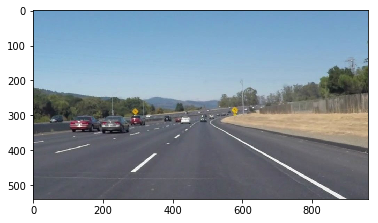

In [2]:
#reading in an image
#image = mpimg.imread('test_images/solidWhiteRight.jpg')

image = mpimg.imread('test_images/solidWhiteCurve.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

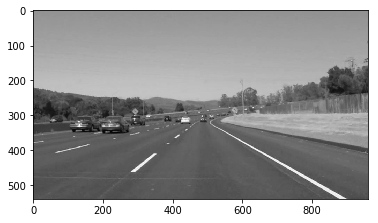

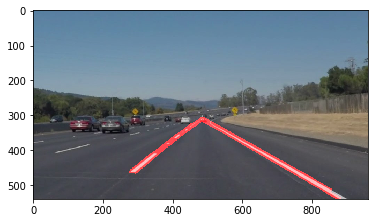

In [3]:
#
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion
plt.imshow(gray, cmap='gray')
# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)
plt.figure()
plt.imshow(blur_gray, cmap='gray')

# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 100
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')

#Hough Transform to detect lines
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
#vertices = np.array([[(0,imshape[0]),(0, 0), (imshape[1], 0), (imshape[1],imshape[0])]], dtype=np.int32)

vertices = np.array([[(480,310),(500, 310), (895,539), (80, 539)]], dtype=np.int32)

cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 5 #minimum number of pixels making up a line
max_line_gap = 150    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
#lines_edges = cv2.addWeighted(color_edges, 1.0, line_image, 0.8, 0) 
lines_edges = cv2.addWeighted(image, 0.8, line_image, 1.0, 0) 
plt.imshow(lines_edges)



## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [12]:
import math
from statistics import mean

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    left_slope = []
    left_intercept = []
    right_slope = []
    right_intercept = []
    for line in lines:
        for x1,y1,x2,y2 in line:
            #print(x1,y1,x2,y2)
            slope = (y2-y1)/(x2-x1)
            intercept = y1 - slope*x1
            if slope < 0:
                left_slope.append(slope)
                left_intercept.append(intercept)
                
            else:
                right_slope.append(slope)
                right_intercept.append(intercept)
            
            #print(slope, intercept)
            #print(intercept)
            
            #cv2.line(img, (x1, y1), (x2, y2), color, thickness)
    
    avg_left_slope = mean(left_slope)
    avg_right_slope = mean(right_slope)
    
    avg_left_intercept = mean(left_intercept)
    avg_right_intercept = mean(right_intercept)
    
    #print(avg_left_slope,avg_right_slope)
    #print(avg_left_intercept,avg_right_intercept)
    #print(image.shape)
    
   
    y1 = image.shape[0]-1
    y2 = int(y1*0.75)
    
    left_x1 = int((y1 - avg_left_intercept) / avg_left_slope)
    right_x1 = int((y1 - avg_right_intercept) / avg_right_slope)

    left_x2 = int((y2 - avg_left_intercept) / avg_left_slope)
    right_x2 = int((y2 - avg_right_intercept) / avg_right_slope)
    
    print(left_x1,y1, left_x2,y2, right_x1, y1, right_x2, y2)
    cv2.line(img, (left_x1, y1), (left_x2, y2), color, thickness)
    cv2.line(img, (right_x1, y1), (right_x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [5]:
import os
os.listdir("test_images/")
print(os.getcwd())
print(os.listdir(os.getcwd()))

/src
['.git', '.ipynb_checkpoints', 'examples', 'P1 - Copy.ipynb', 'P1.ipynb', 'README.md', 'test_images', 'test_images_bak', 'test_videos', 'test_videos_output', 'writeup_template.md']


## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

In [6]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images directory.

image_list = os.listdir("test_images/")

#For every image in the folder

for img_file in image_list:
    img_file_name = "test_images/" + img_file
    print(img_file_name)
    img_out_file_name = "test_images/" + "out_"+ img_file 
    img = mpimg.imread(img_file_name)
    result_image = process_image(img)
    #plt.figure()
    #plt.imshow(result_image)
    
    converted_result = cv2.cvtColor(result_image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(img_out_file_name,converted_result)
    
    #plt.imsave(img_out_file_name,result_image)
    
    #save the image






test_images/out_out_solidWhiteCurve.jpg


NameError: name 'process_image' is not defined

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an import error when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel). Still have problems? Try relaunching Jupyter Notebook from the terminal prompt. Also, consult the forums for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://discussions.udacity.com/t/project-error-of-test-on-videos/274082) for more troubleshooting tips across operating systems.**

In [7]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [8]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    #Convert to GrayScale
    gray_image = grayscale(image)
    #plt.figure()
    #plt.imshow(gray_image,cmap='gray')
    
    #Gaussian Blur
    kernel_size = 5
    gaussian_gray_image = gaussian_blur(gray_image, kernel_size)
    #plt.figure()
    #plt.imshow(gaussian_gray_image,cmap='Greys_r')
    
    #Detect Edges
    low_threshold = 100
    high_threshold = 150
    edge_image = canny(gaussian_gray_image, low_threshold, high_threshold)
    #plt.figure()
    #plt.imshow(edge_image)
    
    
    #Identify region of interest
    vertices = np.array([[(480,310),(500, 310), (895,539), (80, 539)]], dtype=np.int32)
    region_edge_image = region_of_interest(edge_image, vertices)
    #plt.figure()
    #plt.imshow(region_edge_image)
    
    #Detect Lines
    rho = 1
    theta = np.pi/180
    threshold = 25
    min_line_len = 5
    max_line_gap = 150
    line_image = hough_lines(region_edge_image, rho, theta, threshold, min_line_len, max_line_gap)
    
       
    #Superimpose on actual image
    result = weighted_img(line_image, image, 0.7, β=1., λ=0.)
    
    
    
    
    return result

Let's try the one with the solid white lane on the right first ...

In [13]:
white_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/challenge.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

168 539 703 404 954 539 675 404
[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4


  1%|          | 2/251 [00:00<00:13, 18.39it/s]

168 539 703 404 954 539 675 404
220 539 708 404 942 539 653 404
310 539 707 404 947 539 668 404
231 539 697 404 899 539 650 404


  2%|▏         | 6/251 [00:00<00:13, 17.86it/s]

284 539 701 404 971 539 660 404
280 539 703 404 932 539 647 404
260 539 711 404 971 539 658 404


  3%|▎         | 8/251 [00:00<00:13, 18.18it/s]

231 539 717 404 948 539 641 404


  4%|▍         | 10/251 [00:00<00:13, 18.01it/s]

289 539 707 404 928 539 643 404
265 539 707 404 942 539 638 404
315 539 705 404 959 539 634 404
274 539 710 404 996 539 635 404


  6%|▌         | 15/251 [00:00<00:12, 18.56it/s]

323 539 704 404 934 539 643 404
295 539 708 404 905 539 654 404
262 539 694 404 888 539 654 404
250 539 705 404 895 539 642 404


  7%|▋         | 17/251 [00:00<00:12, 18.08it/s]

282 539 702 404 926 539 645 404
263 539 715 404 966 539 634 404
250 539 704 404 903 539 639 404


  8%|▊         | 20/251 [00:01<00:13, 17.52it/s]

259 539 719 404 909 539 643 404


  9%|▉         | 22/251 [00:01<00:13, 17.26it/s]

283 539 707 404 954 539 641 404
291 539 699 404 905 539 636 404
345 539 700 404 998 539 631 404


 10%|▉         | 24/251 [00:01<00:13, 17.25it/s]

270 539 715 404 932 539 639 404


 11%|█         | 27/251 [00:01<00:12, 18.02it/s]

306 539 705 404 960 539 640 404
300 539 710 404 965 539 625 404
298 539 710 404 1004 539 612 404
224 539 725 404 942 539 633 404
265 539

 12%|█▏        | 31/251 [00:01<00:12, 17.90it/s]

 713 404 893 539 641 404
271 539 715 404 970 539 614 404
209 539 732 404 926 539 629 404
262 539 725 404 960 539 613 404


 14%|█▍        | 35/251 [00:01<00:11, 18.03it/s]

185 539 744 404 911 539 618 404
311 539 714 404 1104 539 599 404
246 539 727 404 915 539 562 404
280 539 724 404 919 539 615 404


 16%|█▌        | 39/251 [00:02<00:11, 18.32it/s]

244 539 687 404 938 539 578 404
227 539 693 404 904 539 587 404
167 539 747 404 1048 539 582 404
163 539 742 404 904 539 614 404


 16%|█▋        | 41/251 [00:02<00:11, 18.28it/s]

190 539 722 404 1000 539 600 404
218 539 705 404 613 539 557 404
166 539 738 404 876 539 586 404


 18%|█▊        | 45/251 [00:03<00:26,  7.90it/s]

170 539 732 404 862 539 613 404
176 539 730 404 888 539 630 404


 19%|█▊        | 47/251 [00:03<00:25,  8.04it/s]

297 539 706 404 970 539 554 404
248 539 707 404 841 539 572 404
192 539 702 404 866 539 611 404
205 539 723 404 909 539 610 404


 20%|██        | 51/251 [00:03<00:24,  8.21it/s]

161 539 728 404 886 539 606 404
227 539 705 404 834 539 558 404


 21%|██        | 52/251 [00:04<00:31,  6.29it/s]

140 539 701 404 813 539 567 404


 21%|██        | 53/251 [00:04<00:31,  6.24it/s]

182 539 686 404 969 539 590 404
192 539 689 404 877 539 606 404


 22%|██▏       | 55/251 [00:04<00:27,  7.13it/s]

209 539 714 404 850 539 551 404
144 539 703 404 735 539 549 404


 23%|██▎       | 57/251 [00:04<00:30,  6.35it/s]

274 539 653 404 940 539 572 404
242 539 604 404 925 539 551 404


 24%|██▎       | 59/251 [00:05<00:26,  7.29it/s]

238 539 693 404 919 539 563 404
121 539 679 404 791 539 528 404


 25%|██▍       | 62/251 [00:05<00:25,  7.34it/s]

221 539 575 404 977 539 590 404
116 539 618 404 760 539 513 404


 25%|██▌       | 63/251 [00:05<00:24,  7.69it/s]

112 539 585 404 629 539 512 404
329 539 504 404 711 539 531 404


 26%|██▋       | 66/251 [00:06<00:25,  7.39it/s]

309 539 493 404 733 539 519 404
198 539 525 404 613 539 499 404


 27%|██▋       | 67/251 [00:06<00:23,  7.69it/s]

151 539 538 404 1162 539 590 404
149 539 593 404 1033 539 513 404


 28%|██▊       | 70/251 [00:06<00:24,  7.43it/s]

294 539 520 404 782 539 485 404
65 539 549 404 574 539 484 404


 28%|██▊       | 71/251 [00:06<00:22,  7.85it/s]

96 539 539 404 1086 539 588 404
252 539 522 404 1074 539 602 404


 29%|██▉       | 74/251 [00:07<00:24,  7.34it/s]

124 539 549 404 809 539 496 404
109 539 576 404 624 539 512 404


 30%|██▉       | 75/251 [00:07<00:23,  7.60it/s]

241 539 548 404 1200 539 525 404
138 539 575 404 608 539 487 404


 31%|███       | 78/251 [00:07<00:23,  7.26it/s]

83 539 636 404 562 539 497 404
197 539 605 404 584 539 492 404


 31%|███▏      | 79/251 [00:07<00:22,  7.60it/s]

95 539 811 404 521 539 488 404
15 539 776 404 514 539 481 404


 32%|███▏      | 81/251 [00:08<00:25,  6.70it/s]

28 539 796 404 516 539 481 404
-112 539 918 404 499 539 474 404


 33%|███▎      | 83/251 [00:08<00:24,  6.98it/s]

-126 539 984 404 557 539 469 404
52 539 818 404 500 539 446 404


 34%|███▍      | 85/251 [00:08<00:28,  5.87it/s]

80 539 774 404 533 539 428 404
45 539 822 404 540 539 448 404


 35%|███▍      | 87/251 [00:09<00:25,  6.49it/s]

4 539 817 404 519 539 466 404
43 539 800 404 521 539 469 404


 35%|███▌      | 89/251 [00:09<00:28,  5.74it/s]

60 539 760 404 481 539 451 404
173 539 746 404 482 539 451 404


 36%|███▋      | 91/251 [00:09<00:25,  6.30it/s]

107 539 784 404 497 539 443 404
39 539 776 404 497 539 429 404


 37%|███▋      | 93/251 [00:10<00:28,  5.60it/s]

88 539 826 404 464 539 426 404
83 539 812 404 474 539 438 404


 38%|███▊      | 95/251 [00:10<00:25,  6.15it/s]

61 539 815 404 486 539 442 404
14 539 848 404 446 539 415 404


 39%|███▊      | 97/251 [00:11<00:28,  5.49it/s]

55 539 760 404 474 539 420 404
12 539 770 404 1019 539 367 404


 39%|███▉      | 99/251 [00:11<00:24,  6.23it/s]

5 539 730 404 483 539 412 404
-178 539 821 404 932 539 509 404


 40%|████      | 101/251 [00:11<00:27,  5.41it/s]

-256 539 828 404 889 539 521 404
-240 539 819 404 967 539 565 404


 41%|████      | 103/251 [00:12<00:25,  5.77it/s]

-219 539 789 404 908 539 599 404
-294 539 834 404 859 539 559 404


 42%|████▏     | 105/251 [00:12<00:28,  5.19it/s]

-357 539 785 404 966 539 303 404
-384 539 795 404 911 539 607 404


 43%|████▎     | 107/251 [00:12<00:23,  6.05it/s]

-292 539 756 404 1147 539 603 404
-366 539 724 404 1041 539 587 404


 43%|████▎     | 109/251 [00:13<00:27,  5.22it/s]

-370 539 738 404 998 539 570 404
-266 539 696 404 1004 539 584 404


 44%|████▍     | 111/251 [00:13<00:26,  5.35it/s]

-327 539 696 404 1030 539 554 404
-288 539 682 404 980 539 564 404


 45%|████▌     | 113/251 [00:14<00:28,  4.77it/s]

-230 539 607 404 1047 539 564 404
-125 539 658 404 1055 539 581 404


 46%|████▌     | 115/251 [00:14<00:24,  5.67it/s]

-357 539 654 404 995 539 583 404
-474 539 804 404 686 539 527 404


 47%|████▋     | 117/251 [00:14<00:27,  4.88it/s]

-151 539 666 404 898 539 588 404


 47%|████▋     | 118/251 [00:15<00:25,  5.24it/s]

-110 539 668 404 949 539 578 404
-215 539 714 404 780 539 505 404


 47%|████▋     | 119/251 [00:15<00:24,  5.42it/s]

-116 539 662 404 688 539 498 404


 48%|████▊     | 121/251 [00:15<00:28,  4.60it/s]

-20 539 662 404 520 539 505 404


 49%|████▊     | 122/251 [00:15<00:26,  4.89it/s]

144 539 570 404 565 539 503 404
335 539 505 404 601 539 508 404


 49%|████▉     | 123/251 [00:16<00:25,  5.10it/s]

359 539 506 404 582 539 504 404


 50%|████▉     | 125/251 [00:16<00:28,  4.44it/s]

326 539 501 404 1040 539 524 404


 50%|█████     | 126/251 [00:16<00:26,  4.79it/s]

62 539 601 404 528 539 482 404
341 539 498 404 685 539 502 404


 51%|█████     | 128/251 [00:17<00:25,  4.90it/s]

278 539 502 404 574 539 475 404


 51%|█████▏    | 129/251 [00:17<00:24,  5.06it/s]

372 539 473 404 498 539 458 404
269 539 501 404 623 539 470 404


 52%|█████▏    | 131/251 [00:17<00:20,  5.91it/s]

380 539 457 404 493 539 454 404
341 539 456 404 1410 539 35 404


 53%|█████▎    | 133/251 [00:17<00:21,  5.50it/s]

312 539 460 404 1119 539 494 404
152 539 493 404 967 539 553 404


 54%|█████▍    | 135/251 [00:18<00:19,  5.90it/s]

117 539 490 404 959 539 545 404
119 539 514 404 921 539 563 404


 55%|█████▍    | 137/251 [00:18<00:20,  5.58it/s]

147 539 472 404 1073 539 448 404
64 539 527 404 1033 539 384 404


 55%|█████▌    | 139/251 [00:18<00:17,  6.46it/s]

34 539 547 404 992 539 349 404
2 539 616 404 1061 539 361 404


 56%|█████▌    | 141/251 [00:19<00:18,  5.96it/s]

-23 539 651 404 1219 539 191 404
51 539 802 404 1194 539 273 404


 57%|█████▋    | 143/251 [00:19<00:16,  6.67it/s]

66 539 787 404 1143 539 88 404
70 539 846 404 2936 539 -1296 404


 58%|█████▊    | 145/251 [00:19<00:17,  5.92it/s]

65 539 829 404 1003 539 463 404
99 539 781 404 1036 539 469 404


 59%|█████▊    | 147/251 [00:20<00:15,  6.73it/s]

104 539 837 404 1021 539 615 404
-20 539 870 404 921 539 615 404


 59%|█████▉    | 149/251 [00:20<00:17,  5.86it/s]

28 539 949 404 994 539 563 404
80 539 827 404 880 539 603 404


 60%|██████    | 151/251 [00:20<00:15,  6.55it/s]

74 539 778 404 891 539 636 404
153 539 716 404 923 539 595 404


 61%|██████    | 153/251 [00:21<00:16,  5.97it/s]

170 539 727 404 1031 539 722 404
106 539 754 404 932 539 614 404


 62%|██████▏   | 155/251 [00:21<00:14,  6.81it/s]

138 539 747 404 998 539 666 404
110 539 793 404 964 539 567 404


 63%|██████▎   | 157/251 [00:22<00:18,  5.01it/s]

136 539 763 404 914 539 557 404
201 539 724 404 951 539 620 404


 63%|██████▎   | 159/251 [00:22<00:17,  5.18it/s]

150 539 726 404 915 539 636 404
76 539 714 404 909 539 627 404


 64%|██████▍   | 161/251 [00:22<00:19,  4.55it/s]

153 539 715 404 893 539 675 404


 65%|██████▍   | 162/251 [00:23<00:18,  4.90it/s]

112 539 725 404 885 539 669 404
164 539 719 404 929 539 662 404


 65%|██████▍   | 163/251 [00:23<00:16,  5.19it/s]

80 539 742 404 991 539 680 404


 66%|██████▌   | 165/251 [00:23<00:18,  4.68it/s]

-27 539 761 404 894 539 672 404
150 539 755 404 1013 539 654 404


 66%|██████▌   | 166/251 [00:23<00:16,  5.04it/s]

21 539 768 404 915 539 662 404


 67%|██████▋   | 167/251 [00:24<00:15,  5.28it/s]

105 539 752 404 918 539 659 404


 67%|██████▋   | 169/251 [00:24<00:18,  4.55it/s]

162 539 753 404 918 539 650 404


 68%|██████▊   | 170/251 [00:24<00:16,  4.87it/s]

224 539 760 404 979 539 623 404
125 539 762 404 1108 539 649 404


 68%|██████▊   | 171/251 [00:24<00:15,  5.18it/s]

164 539 770 404 1035 539 589 404


 69%|██████▉   | 173/251 [00:25<00:17,  4.41it/s]

53 539 702 404 842 539 635 404


 69%|██████▉   | 174/251 [00:25<00:16,  4.73it/s]

239 539 719 404 988 539 636 404
121 539 713 404 846 539 648 404


 70%|██████▉   | 175/251 [00:25<00:15,  4.87it/s]

209 539 715 404 915 539 637 404


 70%|███████   | 176/251 [00:26<00:19,  3.90it/s]

200 539 709 404 893 539 631 404


 71%|███████   | 178/251 [00:26<00:17,  4.18it/s]

244 539 707 404 866 539 660 404
181 539 696 404 945 539 625 404


 71%|███████▏  | 179/251 [00:26<00:16,  4.43it/s]

153 539 717 404 852 539 635 404


 72%|███████▏  | 181/251 [00:27<00:17,  4.02it/s]

175 539 706 404 854 539 643 404


 73%|███████▎  | 182/251 [00:27<00:15,  4.33it/s]

195 539 711 404 944 539 652 404


 73%|███████▎  | 183/251 [00:27<00:16,  4.20it/s]

135 539 724 404 854 539 640 404
213 539 705 404 853 539 639 404


 74%|███████▎  | 185/251 [00:28<00:16,  3.91it/s]

200 539 723 404 1022 539 606 404


 74%|███████▍  | 186/251 [00:28<00:15,  4.23it/s]

192 539 706 404 856 539 638 404
242 539 717 404 937 539 588 404


 75%|███████▍  | 187/251 [00:28<00:14,  4.49it/s]

273 539 717 404 910 539 616 404


 75%|███████▌  | 189/251 [00:29<00:14,  4.17it/s]

227 539 718 404 847 539 651 404


 76%|███████▌  | 190/251 [00:29<00:13,  4.50it/s]

222 539 714 404 849 539 650 404
202 539 705 404 902 539 634 404


 76%|███████▌  | 191/251 [00:29<00:12,  4.79it/s]

260 539 704 404 930 539 643 404


 77%|███████▋  | 193/251 [00:30<00:12,  4.52it/s]

168 539 717 404 851 539 649 404
179

 77%|███████▋  | 194/251 [00:30<00:11,  4.79it/s]

 539 704 404 856 539 657 404
237 539 704 404 825 539 596 404


 78%|███████▊  | 196/251 [00:30<00:11,  4.75it/s]

130 539 704 404 852 539 636 404
209 539 701 404 896 539 638 404


 79%|███████▉  | 198/251 [00:31<00:09,  5.72it/s]

206 539 705 404 922 539 622 404
180 539 711 404 900 539 630 404


 80%|███████▉  | 200/251 [00:31<00:09,  5.59it/s]

187 539 712 404 841 539 664 404
243 539 703 404 842 539 664 404


 80%|████████  | 202/251 [00:31<00:07,  6.38it/s]

185 539 701 404 852 539 649 404
220 539 701 404 853 539 656 404


 81%|████████▏ | 204/251 [00:32<00:07,  5.90it/s]

221 539 703 404 857 539 652 404
162 539 711 404 856 539 640 404


 82%|████████▏ | 206/251 [00:32<00:06,  6.55it/s]

135 539 717 404 913 539 622 404
165 539 711 404 856 539 640 404


 83%|████████▎ | 208/251 [00:32<00:07,  5.53it/s]

27 539 732 404 895 539 626 404
97 539 701 404 855 539 647 404


 84%|████████▎ | 210/251 [00:33<00:06,  6.31it/s]

134 539 714 404 857 539 641 404
190 539 712 404 846 539 653 404


 84%|████████▍ | 212/251 [00:33<00:06,  6.15it/s]

183 539 706 404 908 539 625 404
210 539 700 404 972 539 607 404


 85%|████████▌ | 214/251 [00:33<00:05,  7.23it/s]

140 539 692 404 871 539 632 404
236 539 688 404 871 539 632 404


 86%|████████▋ | 217/251 [00:34<00:04,  7.10it/s]

208 539 701 404 862 539 646 404
239 539 690 404 906 539 632 404


 87%|████████▋ | 218/251 [00:34<00:04,  7.56it/s]

242 539 698 404 865 539 635 404
207 539 691 404 863 539 636 404


 88%|████████▊ | 220/251 [00:34<00:04,  6.62it/s]

220 539 690 404 868 539 631 404
191 539 699 404 866 539 632 404


 88%|████████▊ | 222/251 [00:34<00:03,  7.48it/s]

189 539 706 404 866 539 633 404
169 539 706 404 847 539 650 404


 89%|████████▉ | 224/251 [00:35<00:04,  6.70it/s]

261 539 691 404 852 539 644 404
159 539 671 404 875 539 637 404


 90%|█████████ | 226/251 [00:35<00:03,  7.63it/s]

224 539 702 404 904 539 615 404
216 539 712 404 919 539 665 404


 91%|█████████ | 228/251 [00:35<00:03,  6.06it/s]

174 539 718 404 896 539 661 404


 91%|█████████ | 229/251 [00:35<00:03,  6.30it/s]

248 539 701 404 899 539 657 404
194 539 696 404 909 539 614 404


 92%|█████████▏| 230/251 [00:36<00:03,  6.30it/s]

202 539 700 404 897 539 646 404


 92%|█████████▏| 232/251 [00:36<00:03,  5.50it/s]

137 539 688 404 868 539 639 404
237 539 687 404 887 539 650 404


 93%|█████████▎| 234/251 [00:36<00:02,  6.31it/s]

194 539 693 404 1004 539 682 404
149 539 691 404 982 539 695 404


 94%|█████████▍| 236/251 [00:37<00:02,  5.67it/s]

267 539 692 404 972 539 691 404
190 539 686 404 861 539 636 404


 95%|█████████▍| 238/251 [00:37<00:02,  6.29it/s]

273 539 690 404 946 539 666 404
264 539 697 404 914 539 657 404


 96%|█████████▌| 240/251 [00:37<00:01,  5.55it/s]

270 539 700 404 859 539 637 404
232 539 686 404 972 539 666 404


 96%|█████████▋| 242/251 [00:38<00:01,  6.39it/s]

290 539 705 404 986 539 677 404
248 539 710 404 981 539 685 404


 97%|█████████▋| 244/251 [00:38<00:01,  5.83it/s]

177 539 677 404 947 539 666 404
207 539 704 404 997 539 677 404


 98%|█████████▊| 246/251 [00:38<00:00,  6.82it/s]

169 539 713 404 1075 539 693 404
166 539 699 404 919 539 652 404


 99%|█████████▉| 248/251 [00:39<00:00,  5.92it/s]

219 539 694 404 868 539 624 404
267 539 706 404 851 539 620 404


100%|█████████▉| 250/251 [00:39<00:00,  6.81it/s]

181 539 681 404 933 539 641 404
191 539 692 404 944 539 660 404


100%|██████████| 251/251 [00:39<00:00,  5.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge.mp4 

CPU times: user 6.58 s, sys: 440 ms, total: 7.02 s
Wall time: 43.6 s


#### Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [ ]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [ ]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))